# CNN for Classification
---
In this notebook, we define **and train** an CNN to classify images from the [Fashion-MNIST database](https://github.com/zalandoresearch/fashion-mnist).

### Load the [data](http://pytorch.org/docs/master/torchvision/datasets.html)

In this cell, we load in both **training and test** datasets from the FashionMNIST class.

In [1]:
# our basic libraries
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors for input into a CNN

## Define a transform to read the data in as a tensor
data_transform = transforms.ToTensor()

# choose the training and test datasets
train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

test_data = FashionMNIST(root='./data', train=False,
                                  download=True, transform=data_transform)


# Print out some stats about the training and test data
print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data))

Train data, number of images:  60000
Test data, number of images:  10000


In [2]:
# prepare data loaders, set the batch_size
## TODO: you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss
batch_size = 20

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize some training data

This cell iterates over the training dataset, loading a random batch of image/label data, using `dataiter.next()`. It then plots the batch of images and labels in a `2 x batch_size/2` grid.

<ipython-input-3-2572f2a357de>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])


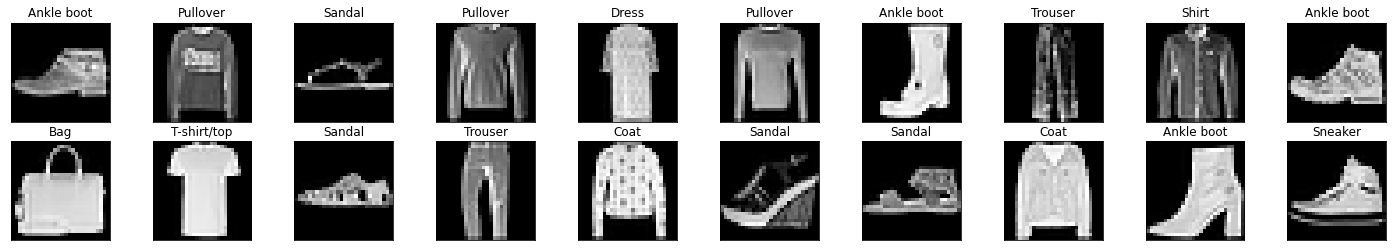

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

In [160]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [134]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(20 * 4 * 4, 512)  # 5*5 from image dimension
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# instantiate and print your Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [135]:
correct, total = 0, 0

# Iterate through test dataset
for images, labels in test_loader:
    outputs = net(images)
    predicted = outputs.argmax(dim=1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

accuracy = 100 * correct.item() / total
print(f'Accuracy before training: {accuracy}%')

Accuracy before training: 9.23%


In [166]:
def train(n_epochs):
    
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = []
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            inputs, labels = data       
            optimizer.zero_grad() # zero the parameter (weight) gradients

            # forward pass to get outputs
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            optimizer.step()
            
            running_loss.append(loss.item())
            
            if batch_i % 100 == 0:
                print(f'\rEpoch: {epoch + 1:<3}, Batch: {batch_i:<6}, Curr Loss: {round(running_loss[-1],5):<10} Avg. Loss: {round(np.mean(running_loss),5):<7}\r', end='')        
        print()

    print('Finished Training')

n_epochs = 30 # start small to see if your model works, initially
train(n_epochs)

Epoch: 1  , Batch: 2900  , Curr Loss: 0.03643    Avg. Loss: 0.2174 
Epoch: 2  , Batch: 2900  , Curr Loss: 0.18243    Avg. Loss: 0.19956
Epoch: 3  , Batch: 2900  , Curr Loss: 0.26608    Avg. Loss: 0.18654
Epoch: 4  , Batch: 2900  , Curr Loss: 0.45674    Avg. Loss: 0.17152
Epoch: 5  , Batch: 2900  , Curr Loss: 0.18981    Avg. Loss: 0.1577 
Epoch: 6  , Batch: 2900  , Curr Loss: 0.08827    Avg. Loss: 0.14501
Epoch: 7  , Batch: 2900  , Curr Loss: 0.09691    Avg. Loss: 0.13735
Epoch: 8  , Batch: 2900  , Curr Loss: 0.12315    Avg. Loss: 0.12489
Epoch: 9  , Batch: 2900  , Curr Loss: 0.18755    Avg. Loss: 0.11753
Epoch: 10 , Batch: 2900  , Curr Loss: 0.00033    Avg. Loss: 0.10896
Epoch: 11 , Batch: 2900  , Curr Loss: 0.04993    Avg. Loss: 0.10233
Epoch: 12 , Batch: 2900  , Curr Loss: 0.00778    Avg. Loss: 0.0986 
Epoch: 13 , Batch: 2900  , Curr Loss: 0.18956    Avg. Loss: 0.09073
Epoch: 14 , Batch: 2900  , Curr Loss: 0.08253    Avg. Loss: 0.08471
Epoch: 15 , Batch: 2900  , Curr Loss: 0.10355   

In [168]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loader):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(batch_size):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.788834

Test Accuracy of T-shirt/top: 86% (862/1000)
Test Accuracy of Trouser: 97% (973/1000)
Test Accuracy of Pullover: 89% (895/1000)
Test Accuracy of Dress: 89% (893/1000)
Test Accuracy of  Coat: 84% (842/1000)
Test Accuracy of Sandal: 96% (964/1000)
Test Accuracy of Shirt: 61% (613/1000)
Test Accuracy of Sneaker: 97% (975/1000)
Test Accuracy of   Bag: 96% (964/1000)
Test Accuracy of Ankle boot: 95% (955/1000)

Test Accuracy (Overall): 89% (8936/10000)


### Visualize sample test results

<ipython-input-60-2abde717b697>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])


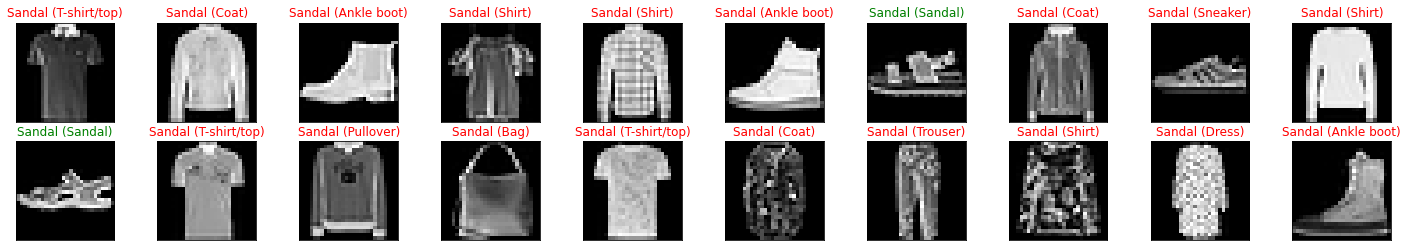

In [60]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

### Question: What are some weaknesses of your model? (And how might you improve these in future iterations.)

**Answer**: Double-click and write answer, here.

### Save Your Best Model

Once you've decided on a network architecture and are satisfied with the test accuracy of your model after training, it's time to save this so that you can refer back to this model, and use it at a later data for comparison of for another classification task!

In [ ]:
## TODO: change the model_name to something uniqe for any new model
## you wish to save, this will save it in the saved_models directory
model_dir = 'saved_models/'
model_name = 'model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
# when you're ready, un-comment the line below
# torch.save(net.state_dict(), model_dir+model_name)

### Load a Trained, Saved Model

To instantiate a trained model, you'll first instantiate a new `Net()` and then initialize it with a saved dictionary of parameters (from the save step above).

In [ ]:
# instantiate your Net
# this refers to your Net class defined above
net = Net()

# load the net parameters by name
# uncomment and write the name of a saved model
#net.load_state_dict(torch.load('saved_models/model_1.pt'))

print(net)

# Once you've loaded a specific model in, you can then 
# us it or further analyze it! 
# This will be especialy useful for feature visualization 